In [7]:
import os
import csv
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

nltk_stopwords = set(stopwords.words('french')+ [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'","_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", "cinq",
    "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "peu", "peuvent", "peut", "peut", "peut", "peut",
    'chez', 'méme', "soit", "dont", "non", "tous", "toutes", "toute", "toute", "toute", "toute", "toute", "toute", "toute",
    'c’est', "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", "souvent", "trés", "leurs", "quelques", 
    " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
import pandas as pd

def get_word_occurences(directory_path, stopwords=nltk_stopwords):
    word_counter = Counter()
    sub_dir_name = directory_path.strip('/').split('/')[-1]
    os.makedirs(f"../data/occurences/{sub_dir_name}", exist_ok=True)
    for sub_dir in os.listdir(directory_path):
        for file in os.listdir(os.path.join(directory_path, sub_dir)):
            p = os.path.join(directory_path, sub_dir)
            f = os.path.join(p, file)
            if f.endswith(".txt"):
                with open(f, 'r', encoding='utf-8') as f:
                    text = f.read()
                    tokens = word_tokenize(text)
                    words = [word.lower() for word in tokens if word.isalpha() and len(word) > 3 and word.lower() not in stopwords]
                    for word in words:
                        if word.endswith('s') and word[:-1] in word_counter:
                            word_counter[word[:-1]] += 1
                        else:
                            word_counter[word] += 1
        df = pd.DataFrame(word_counter.items(), columns=['Word', 'Count'])
        df.to_csv(f"../data/occurences/{sub_dir_name}/{sub_dir}_word_occurences.csv", index=False)
        

In [13]:
path_mixte = '../data/txt/ouvrages_mixtes/'
path_femmes = '../data/txt/ouvrages_feminins/'
path_hommes = '../data/txt/ouvrages_masculins/'

get_word_occurences(path_mixte)
get_word_occurences(path_hommes)
get_word_occurences(path_femmes)


In [14]:
import pandas as pd
import glob

def analyze_word_occurrences(directory_path):
    all_files = glob.glob(directory_path + "/*.csv")
    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df = combined_df.groupby('Word').sum().reset_index()
    combined_df = combined_df.sort_values(by='Count', ascending=False)
    return combined_df

# Analyse des occurrences de mots pour chaque catégorie
df_mixte = analyze_word_occurrences("../data/occurences/ouvrages_mixtes")
df_femmes = analyze_word_occurrences("../data/occurences/ouvrages_feminins")
df_hommes = analyze_word_occurrences("../data/occurences/ouvrages_masculins")

# Affichage des résultats
print("Top 10 des mots les plus fréquents dans les ouvrages mixtes:")
print(df_mixte.head(10))

print("\nTop 10 des mots les plus fréquents dans les ouvrages féminins:")
print(df_femmes.head(10))

print("\nTop 10 des mots les plus fréquents dans les ouvrages masculins:")
print(df_hommes.head(10))

Top 10 des mots les plus fréquents dans les ouvrages mixtes:
            Word  Count
3749      enfant   2465
10836      temps   1067
6485        main   1038
1310        bras   1005
8019        pied    951
6972   mouvement    881
5785       jeune    864
5948        lait    788
5820        jour    746
8238    position    701

Top 10 des mots les plus fréquents dans les ouvrages féminins:
          Word  Count
17575   enfant  90489
20068    femme  63752
28116     lait  50081
27421     jour  35480
31416   malade  34992
31422  maladie  32106
27256    jeune  28118
7520     cause  27851
33978     mére  26093
38208    petit  24757

Top 10 des mots les plus fréquents dans les ouvrages masculins:
          Word   Count
39232    femme  359900
33937   enfant  207152
53831     jour  124096
76947    point  118270
60630  maladie   98469
55018     lait   97050
47478    homme   93656
53421    jeune   88055
32235    effet   84270
72499   partie   83771


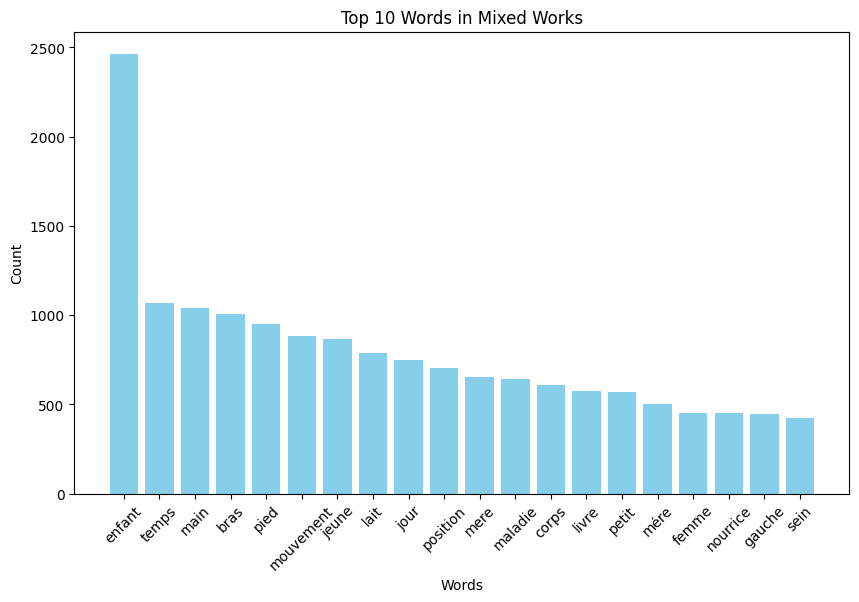

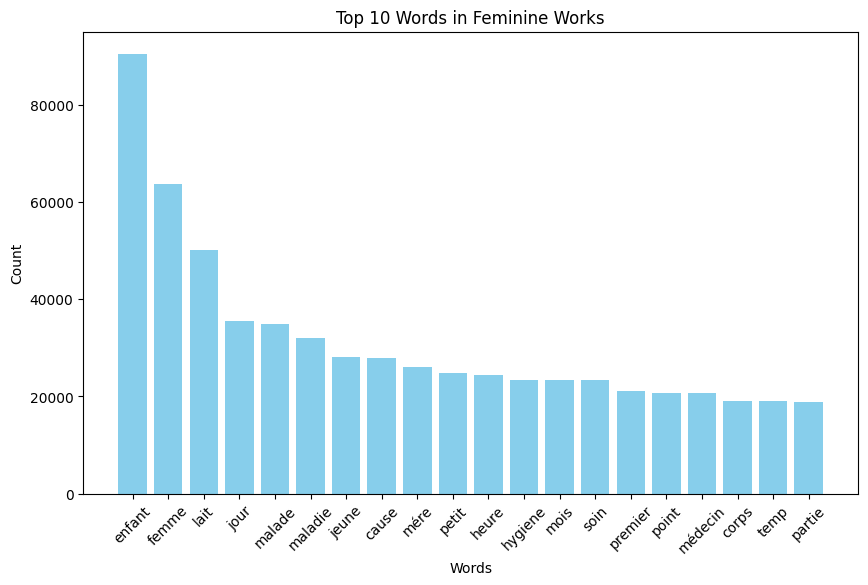

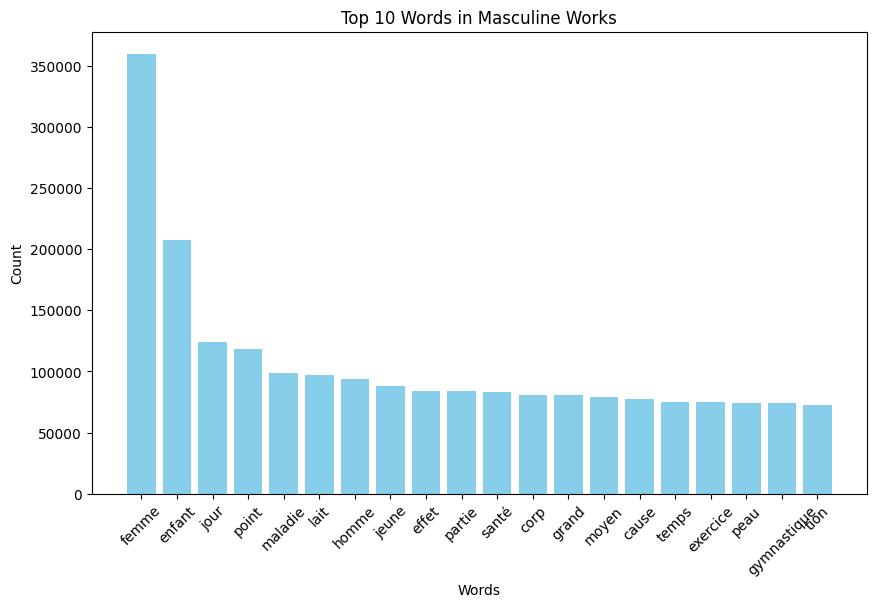

In [15]:
import matplotlib.pyplot as plt

def plot_top_words(df, title):
    top_words = df.head(20)
    plt.figure(figsize=(10, 6))
    plt.bar(top_words['Word'], top_words['Count'], color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plotting the top 10 words for each category
plot_top_words(df_mixte, 'Top 10 Words in Mixed Works')
plot_top_words(df_femmes, 'Top 10 Words in Feminine Works')
plot_top_words(df_hommes, 'Top 10 Words in Masculine Works')